## WEEK 1 RECAP

### Learning Objectives
1. Overview of Machine Learning
2. Supervised and Unsupervised Machine Learning
3. Regression Model
4. Train the model with Gradient Descent

### Note:

This notebook is my **original code** for me to assess my understanding about what I have learned in **Week 1**

In this one, I will perform **Linear Regression** with **Gradient Descent** on an easy dataset

In [111]:
import math

import numpy as np
import matplotlib.pyplot as plt

In [112]:
# Creating dataset
np.random.seed(0)
x_train = np.arange(50)

mean = 50
std = 1
y_train = np.random.normal(mean, std, 50)

In [113]:
# View/Inspect dataset
print(x_train.shape, type(x_train))
print(x_train[:5])
print(y_train.shape, type(y_train))
print(y_train[:5])

(50,) <class 'numpy.ndarray'>
[0 1 2 3 4]
(50,) <class 'numpy.ndarray'>
[51.76405235 50.40015721 50.97873798 52.2408932  51.86755799]


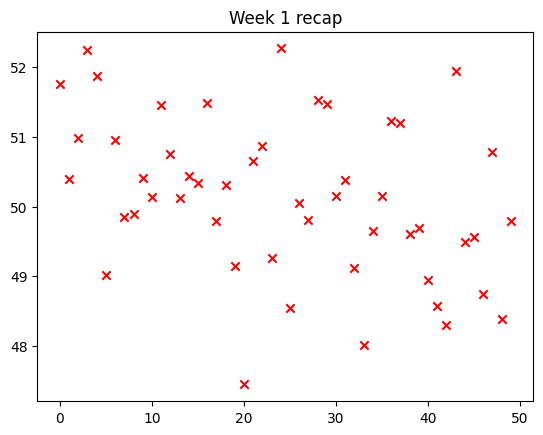

In [114]:
# Plot dataset
plt.scatter(x_train, y_train, c='r', marker='x')
plt.title("Week 1 recap")
plt.show()

### Follow these steps to find the model for this dataset:

- Initialize w and b
- Calculate **Cost function** 
- Update w and b using **Gradient descent**
- Plot **Cost vs # Iteration** 

In [115]:
# Initialize w and b
w_init = 0
b_init = 0

In [116]:
# Cost function 
def compute_cost(x_train, y_train, w_current, b_current):
    """
    Calculate cost at certain pair (w, b)

    Args:
        x_train ((m, ) ndarray): features
        y_train ((m, ) ndarray): targets
        w (scalar): parameter of model
        b (scalar): parameter of model
        
    Returns:
        total_cost (float): cost at certain pair (w, b)
    """
    
    w = w_current
    b = b_current
    
    m = x_train.shape[0]
    total_cost = 0
    
    for i in range(m):
        cost = ((w * x_train[i] + b) - y_train[i]) ** 2
        total_cost += cost
        
    total_cost /= 2 * m
    
    return total_cost

In [117]:
# Compute gradient function
def compute_gradient(x_train, y_train, w_current, b_current):
    """
    Calculate gradient at certain pair (w, b) 

    Args:
        x_train ((m, ) ndarray): features
        y_train ((m, ) ndarray): targets
        w (scalar): current w
        b (scalar): current b
        
    Returns:
        dj_dw (float): gradient wrt w 
        dj_db (float): gradient wrt b 
    """
    
    w = w_current
    b = b_current
    
    m = x_train.shape[0]
    dj_dw = 0
    dj_db = 0
    
    for i in range(m):
        dj_dw += ((w * x_train[i] + b) - y_train[i]) * x_train[i]
        dj_db += (w * x_train[i] + b) - y_train[i]
        
    dj_dw /= m
    dj_db /= m
    
    return dj_dw, dj_db

In [118]:
# Gradient descent function
def gradient_descent(x_train, y_train, w_init, b_init, cost_function, gradient_function, num_iters=100000, learning_rate=0.001):
    """
    Calculate the optimal pair (w, b) so that cost reaches global/local minima

    Args:
        x_train ((m, ) ndarray): features
        y_train ((m, ) ndarray): targets
        w_init (scalar): initial w
        b_init (scalar): initial b
        cost_function (function): Function used to compute cost
        gradient_function (function): Function used to compute gradient
        learning_rate (float): alpha (default = 0.001)
        num_iters (int): number of iterations. Defaults to 100000.
        
    Returns:
        w (scalar): w optimal
        b (scalar): b optimal
        J_history (list): Cost history
        P_history (list): (w, b) history
    """
    
    w, b = w_init, b_init
    alpha = learning_rate
    
    J_history = []
    P_history = []
    
    for i in range(num_iters):
        dj_dw, dj_db = gradient_function(x_train, y_train, w, b)
        cost = cost_function(x_train, y_train, w, b)
        
        w -= alpha * dj_dw
        b -= alpha * dj_db
        
        J_history.append(cost)
        P_history.append([w, b])
        
        if i % math.ceil(num_iters / 10) == 0:
            print(f"iter {i}, cost: {J_history[-1]:0.2e}, dj_dw: {dj_dw:0.3e}, dj_db = {dj_db:0.3e}, w = {w:0.3e}, b = {b:0.5e}")
        
    return w, b, J_history, P_history

In [119]:
# Apply functions to dataset
# Converges around 30,000 iterations
# w_optimal, b_optimal, _, _ = gradient_descent(x_train, y_train, w_init, b_init, compute_cost, compute_gradient, 50000, 0.001)
# print(f"Your model: f = {w_optimal} * x + {b_optimal}")

# Converges around 12,000 iterations
w_optimal, b_optimal, J_history, _ = gradient_descent(x_train, y_train, w_init, b_init, compute_cost, compute_gradient, 20000, 0.002)
print(f"Your model: f = {w_optimal} * x + {b_optimal}")


iter 0, cost: 1.26e+03, dj_dw: -1.222e+03, dj_db = -5.014e+01, w = 2.445e+00, b = 1.00281e-01
iter 2000, cost: 4.29e+01, dj_dw: 1.415e-01, dj_db = -4.669e+00, w = 5.209e-01, b = 3.27127e+01
iter 4000, cost: 5.95e+00, dj_dw: 5.055e-02, dj_db = -1.667e+00, w = 1.675e-01, b = 4.43701e+01
iter 6000, cost: 1.24e+00, dj_dw: 1.805e-02, dj_db = -5.955e-01, w = 4.130e-02, b = 4.85334e+01
iter 8000, cost: 6.35e-01, dj_dw: 6.447e-03, dj_db = -2.127e-01, w = -3.769e-03, b = 5.00203e+01
iter 10000, cost: 5.58e-01, dj_dw: 2.303e-03, dj_db = -7.596e-02, w = -1.987e-02, b = 5.05514e+01
iter 12000, cost: 5.48e-01, dj_dw: 8.223e-04, dj_db = -2.713e-02, w = -2.561e-02, b = 5.07410e+01
iter 14000, cost: 5.47e-01, dj_dw: 2.937e-04, dj_db = -9.689e-03, w = -2.767e-02, b = 5.08087e+01
iter 16000, cost: 5.47e-01, dj_dw: 1.049e-04, dj_db = -3.460e-03, w = -2.840e-02, b = 5.08329e+01
iter 18000, cost: 5.47e-01, dj_dw: 3.746e-05, dj_db = -1.236e-03, w = -2.866e-02, b = 5.08416e+01
Your model: f = -0.028756634770

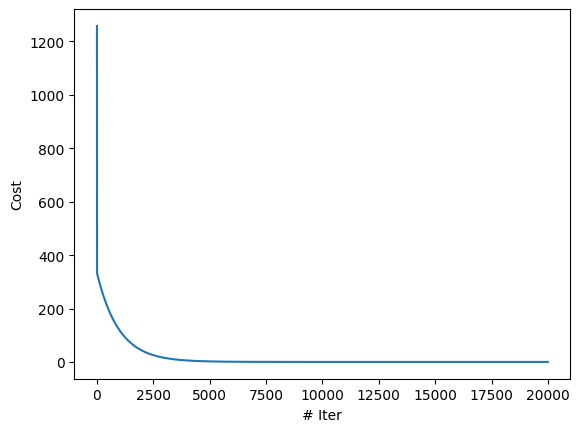

In [120]:
# Plot cost vs # iter graph
num_iter = np.arange(20000)
plt.plot(num_iter, J_history[:len(num_iter)])
plt.ylabel("Cost")
plt.xlabel("# Iter")
plt.show()

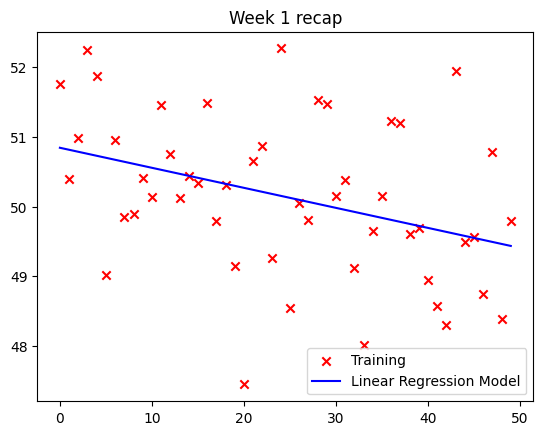

In [121]:
# Fit model to dataset
predictions = w_optimal * x_train + b_optimal

plt.scatter(x_train, y_train, c='r', marker='x', label="Training")
plt.plot(x_train, predictions, c='b', label="Linear Regression Model")
plt.title("Week 1 recap")
plt.legend()
plt.show()